In [ ]:
'''

Introduction to Ensemble Learning

    Basic Ensemble Techniques
        1. Max Voting
        2. Averaging
        3. Weighted Average

    Advanced Ensemble Techniques
       1. Stacking
       2. Blending
       3. Bagging
       4. Boosting
       
    Algorithms based on Bagging and Boosting
        1.Bagging
            1. Bagging meta-estimator
            2. Random forest
        
        2.Boosting
            1. AdaBoost
            2. GBM
            3. XGBM
            4. Light GBM
            5. CatBoost 

In [ ]:
'''
Max Voting:()
    - A voting ensemble works by combining the predictions from multiple models. It can be used for classification or 
      regression.
    - In the case of regression, this involves calculating the average of the predictions from the models
    - In the case of classification, the predictions for each label are summed and the label with the majority vote is 
      predicted.
      
      Regression Voting Ensemble: Predictions are the average of contributing models.
      Classification Voting Ensemble: Predictions are the majority vote of contributing models.
      
There are two approaches to the majority vote prediction for classification; they are hard voting and soft voting.
    1. Hard Voting(majority voting)). Predict the class with the largest sum of votes from models
        
        Ex: Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output.
            Hence A will be the final prediction.
        
    2. Soft Voting. Predict the class with the largest summed probability from models.
            
            Ex: The prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40).So the average for 
                class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability 
                averaged by each classifier.

In [ ]:
# uisng Mode to finalize the preduction

model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [ ]:
# 'VotingClassifier' in SkLearn

from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

In [ ]:
'''
Averaging:
    - Multiple predictions are made for each data point in averaging. 
    - In this method, we take an average of predictions from all the models and use it to make the final prediction.

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1+pred2+pred3)/3

In [ ]:
'''
Weighted Average
    - Extension of the averaging method.All models are assigned different weights defining the importance of each model for 
      prediction. 

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1*0.3 + pred2*0.3 + pred3*0.4)

In [ ]:
'''
Stacking Ensemble Learning :
    - Some Time called as Stacked Generalization
    - It uses predictions from multiple models (for example decision tree, knn or svm) to build a new model.
    
How Stacking Ensemble Works


Steps:
    1. The train set is split into 10 parts.
    2. A base model (suppose a decision tree) is fitted on 9 parts and predictions are made for the 10th part.
    3. The base model (in this case, decision tree) is then fitted on the whole train dataset.
    4. Using this model, predictions are made on the test set.
    5. Steps 2 to 4 are repeated for another base model (say knn) resulting in another set of predictions for the 
       train set and test set.
    6. The predictions from the train set are used as features to build a new model
    7. This model is used to make final predictions on the test prediction set.

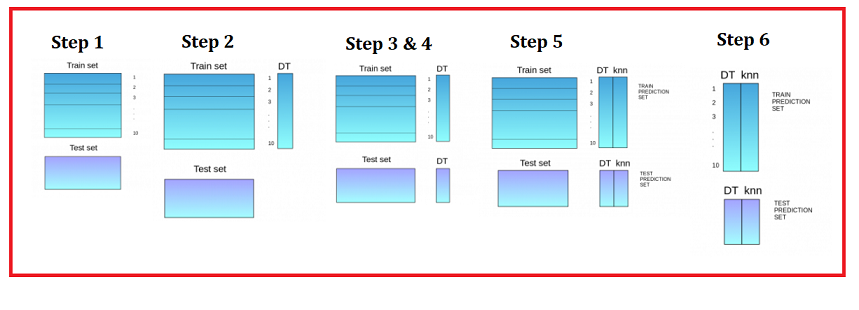

In [ ]:
def Stacking(model,train,y,test,n_fold):
    
   folds = StratifiedKFold(n_splits=n_fold,random_state=1)
   test_pred = np.empty((test.shape[0],1),float)
   train_pred = np.empty((0,1),float)

   for train_indices,val_indices in folds.split(train,y.values):
      x_train,x_val = train.iloc[train_indices],train.iloc[val_indices]
      y_train,y_val = y.iloc[train_indices],y.iloc[val_indices]

      model.fit(X=x_train,y=y_train)
      train_pred = np.append(train_pred,model.predict(x_val))
      test_pred = np.append(test_pred,model.predict(test))
    
    return test_pred.reshape(-1,1),train_pred

In [ ]:
# Model 1
model1 = tree.DecisionTreeClassifier(random_state=1)
test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=x_train,test=x_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)


# Model 2
model2 = KNeighborsClassifier()
test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=x_train,test=x_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

# Create a third model, logistic regression, on the predictions of the decision tree and knn models.
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,y_train)
model.score(df_test, y_test)

In [ ]:
'''
Blending Ensemble Learning
    - Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make 
      predictions.
    - In other words, unlike stacking, the predictions are made on the holdout(validation) set only.
    
Steps:
    1. The train set is split into training and validation sets.
    2. Model(s) are fitted on the training set.
    3. The predictions are made on the validation set and the test set.
    4. The validation set and its predictions are used as features to build a new model.
    5. This model is used to make final predictions on the test and meta-features.
      

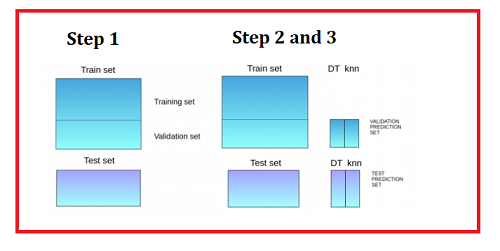

In [ ]:
# Model 1
model1 = tree.DecisionTreeClassifier()
model1.fit(x_train, y_train)

val_pred1=model1.predict(x_val)
test_pred1=model1.predict(x_test)

val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

# Model 2
model2 = KNeighborsClassifier()
model2.fit(x_train,y_train)

val_pred2=model2.predict(x_val)
test_pred2=model2.predict(x_test)

val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

# Combining the meta-features and the validation set, a logistic regression model is built to make predictions on the test set.

df_val=pd.concat([x_val, val_pred1,val_pred2],axis=1)
df_test=pd.concat([x_test, test_pred1,test_pred2],axis=1)

model = LogisticRegression()
model.fit(df_val,y_val)
model.score(df_test,y_test)